In [2]:
import pandas as pd

df = pd.read_csv("../datasets/supermarket_sales .csv")

### 1. Explore the Dataset

In [3]:

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
df["Date"].head(5)

0     1/5/2019
1     3/8/2019
2     3/3/2019
3    1/27/2019
4     2/8/2019
Name: Date, dtype: object

### 2. Data Preprocessing and Cleaning

In [9]:
df["Date"] = pd.to_datetime(df["Date"])

In [10]:
df["Date"].head(5)

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [11]:
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M").dt.time

In [12]:
df["Time"].head(5)

0    13:08:00
1    10:29:00
2    13:23:00
3    20:33:00
4    10:37:00
Name: Time, dtype: object

In [13]:
df.duplicated().sum()

np.int64(0)

### 3. Data Visualization

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

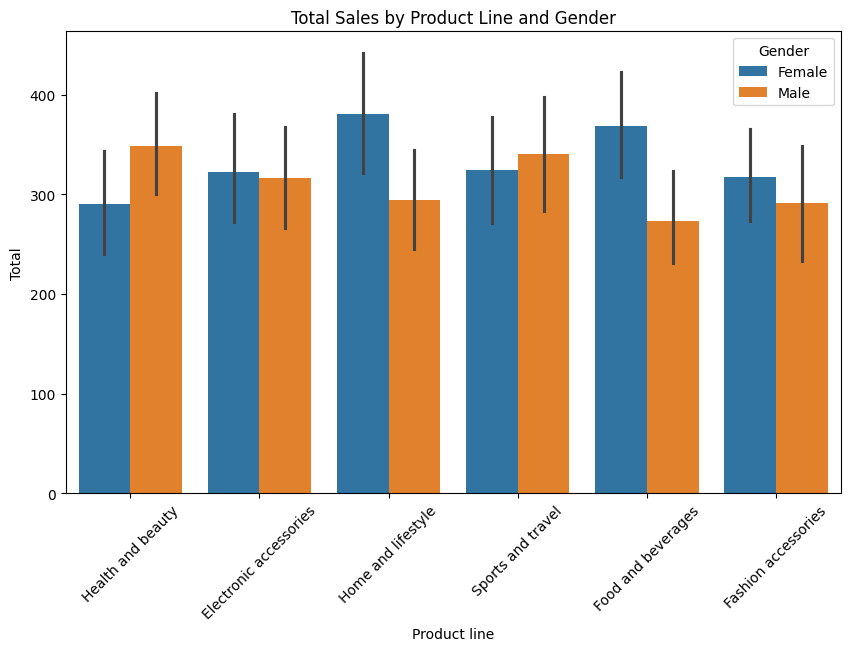

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


# Plot sales by product line
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total', data=df, hue='Gender')
plt.title('Total Sales by Product Line and Gender')
plt.xticks(rotation=45)

# compare sales performance across product lines and genders.


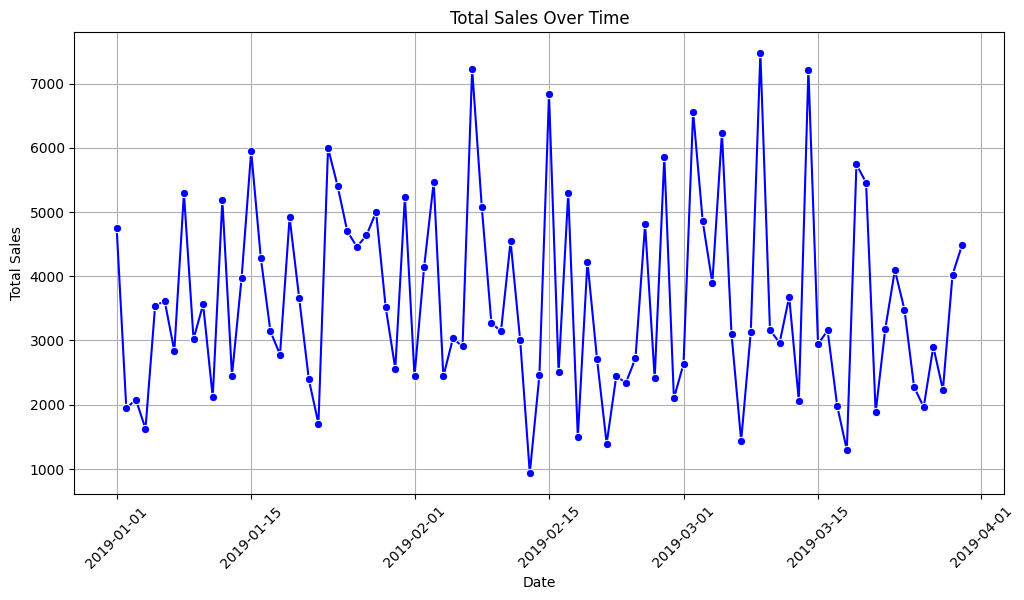

In [ ]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Group by date and calculate total sales
sales_trend = df.groupby('Date')['Total'].sum().reset_index()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total', data=sales_trend, marker='o', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)

# how sales fluctuate over time.

C:\Users\User\AppData\Local\Temp\ipykernel_18048\1752988661.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Total', data=product_sales, palette='coolwarm')


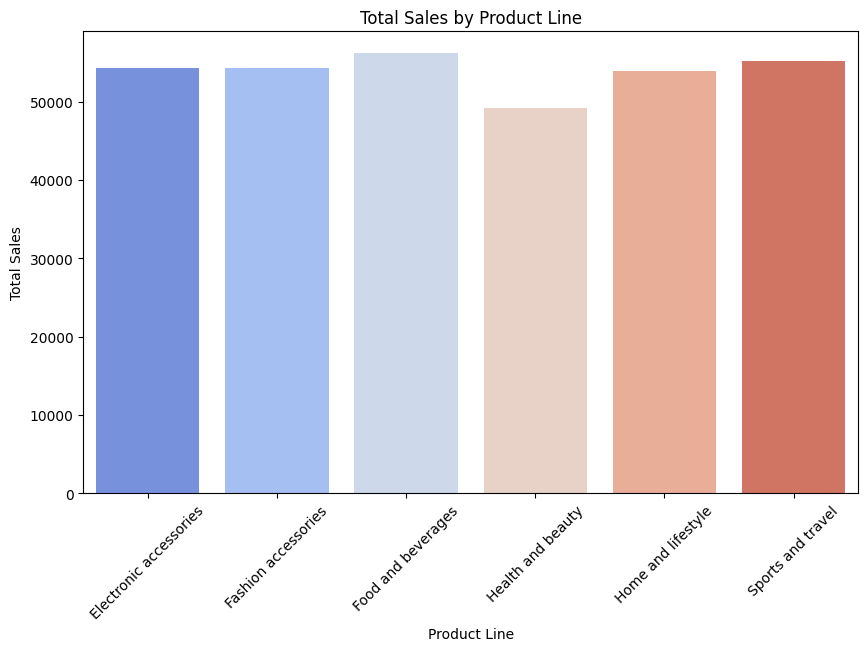

In [ ]:
# Group by product line and calculate total sales
product_sales = df.groupby('Product line')['Total'].sum().reset_index()

# Plot total sales by product line
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total', data=product_sales, palette='coolwarm')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# compare sales performance across different product lines.

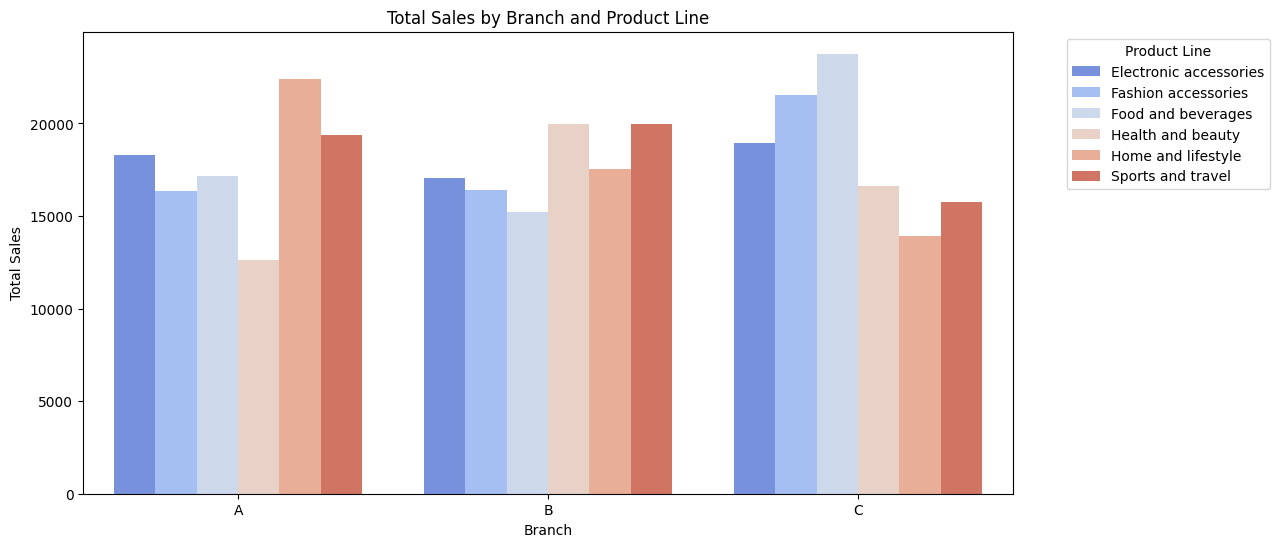

In [ ]:
# Group by branch and product line, then calculate total sales
branch_product_sales = df.groupby(['Branch', 'Product line'])['Total'].sum().reset_index()

# Plot grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Branch', y='Total', hue='Product line', data=branch_product_sales, palette='coolwarm')
plt.title('Total Sales by Branch and Product Line')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

# compare sales performance across branches and product lines simultaneously.

C:\Users\User\AppData\Local\Temp\ipykernel_18048\566459837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Branch"], y=df["Total"], estimator=sum, palette="coolwarm")


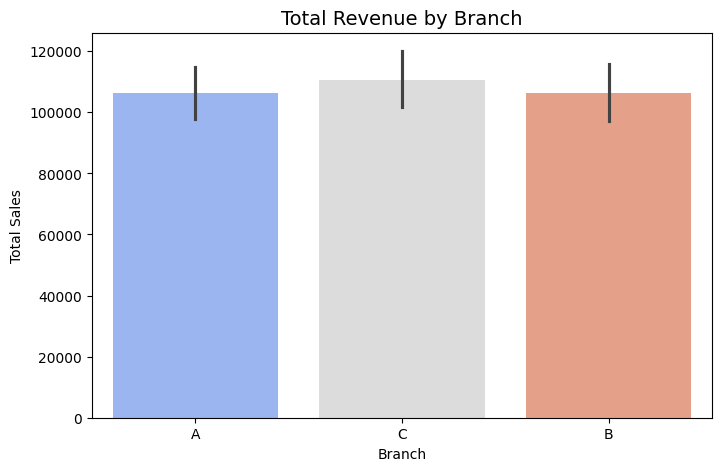

In [ ]:
plt.figure(figsize=(8, 5))

# Create bar plot for total sales per branch
sns.barplot(x=df["Branch"], y=df["Total"], estimator=sum, palette="coolwarm")

# Titles and labels
plt.title("Total Revenue by Branch", fontsize=14)
plt.xlabel("Branch")
plt.ylabel("Total Sales")


#  compare branch performance and determine which location is generating the most revenue.

In [40]:
# plt.figure(figsize=(8, 5))

# # Create box plot to compare sales for each customer type
# sns.boxplot(x="Customer type", y="Total", data=df, palette="pastel")

# # Titles and labels
# plt.title("Sales Distribution by Customer Type", fontsize=14)
# plt.xlabel("Customer Type")
# plt.ylabel("Total Sales")


C:\Users\User\AppData\Local\Temp\ipykernel_18048\3549135640.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Gender"], y=df["Total"], estimator=sum, palette="coolwarm")


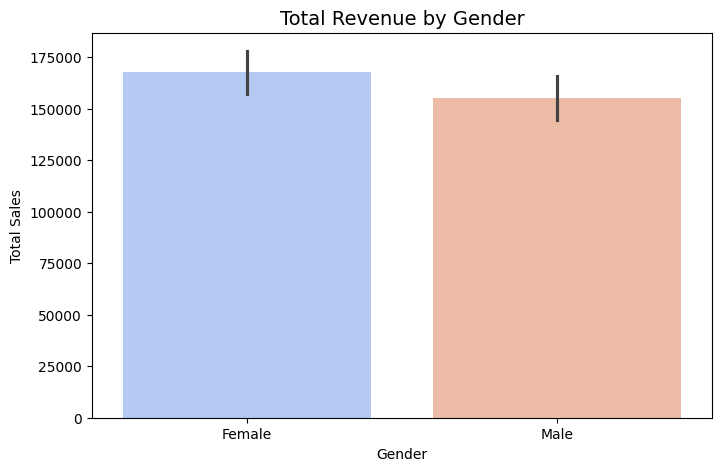

In [ ]:
plt.figure(figsize=(8, 5))

# Create bar plot for total sales by gender
sns.barplot(x=df["Gender"], y=df["Total"], estimator=sum, palette="coolwarm")

# Titles and labels
plt.title("Total Revenue by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Total Sales")



#  whether male or female customers contribute more to total revenue.

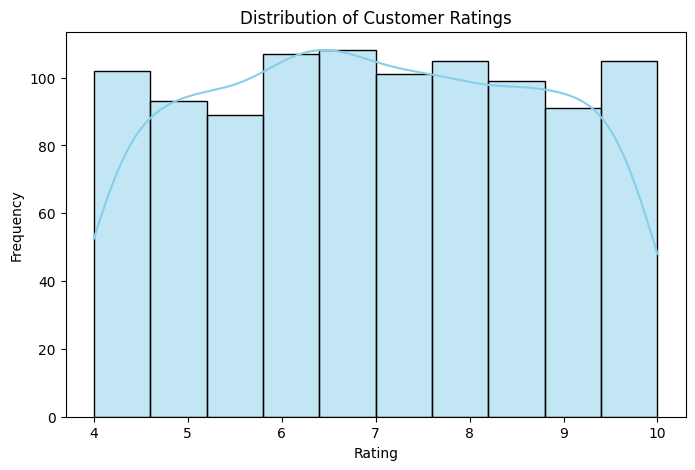

In [ ]:
# Plot distribution of customer ratings
plt.figure(figsize=(8, 5))

sns.histplot(df['Rating'], bins=10, kde=True, color='skyblue')

plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')


# identify how satisfied customers are and if there are any negative reviews.


Text(0.5, 1.0, 'Payment Methods Distribution')

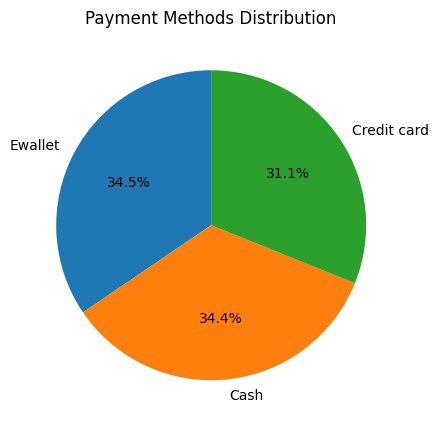

In [ ]:
payment_counts = df['Payment'].value_counts()

plt.figure(figsize=(5, 7))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Methods Distribution')


C:\Users\User\AppData\Local\Temp\ipykernel_18048\1277819275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Payment"], y=df["Total"], estimator=sum, palette="coolwarm")


Text(0, 0.5, 'Total Sales')

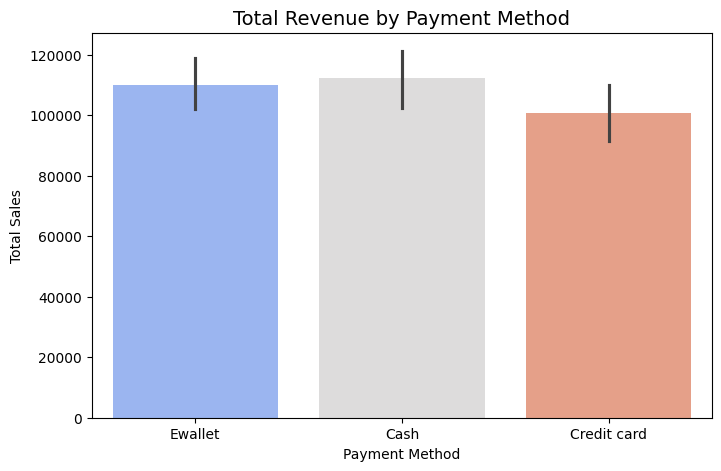

In [ ]:
plt.figure(figsize=(8, 5))

# Create bar plot for total sales by payment method
sns.barplot(x=df["Payment"], y=df["Total"], estimator=sum, palette="coolwarm")

# Titles and labels
plt.title("Total Revenue by Payment Method", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Total Sales")

#  This will show if one payment method leads to higher sales than others.

C:\Users\User\AppData\Local\Temp\ipykernel_18048\414632679.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='gross income', data=gross_income, palette="coolwarm")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Electronic accessories'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Food and beverages'),
  Text(3, 0, 'Health and beauty'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Sports and travel')])

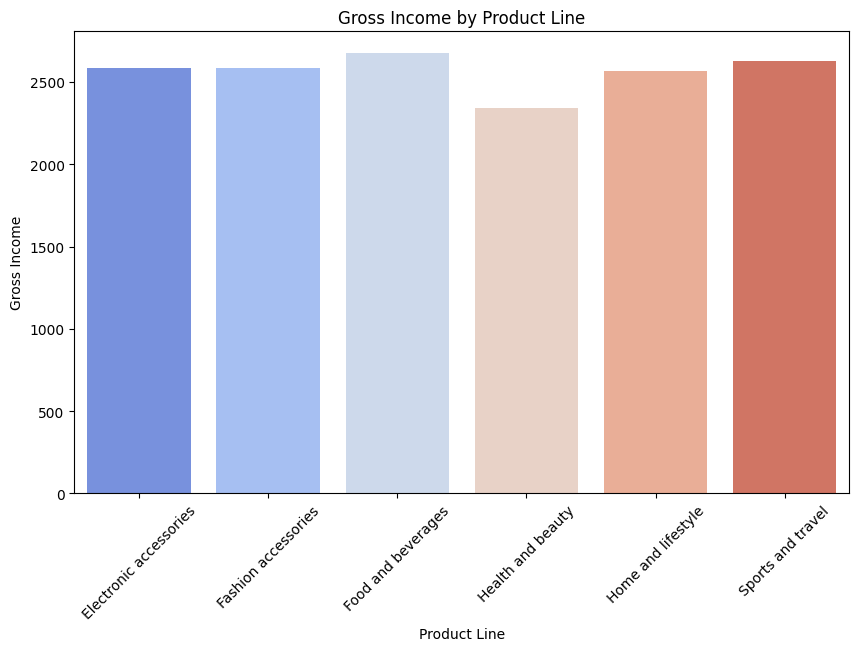

In [ ]:
# Group by product line and calculate total gross income
gross_income = df.groupby('Product line')['gross income'].sum().reset_index()

# Plot gross income by product line
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='gross income', data=gross_income, palette="coolwarm")
plt.title('Gross Income by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.xticks(rotation=45)

# compare the gross income generated by different product lines.

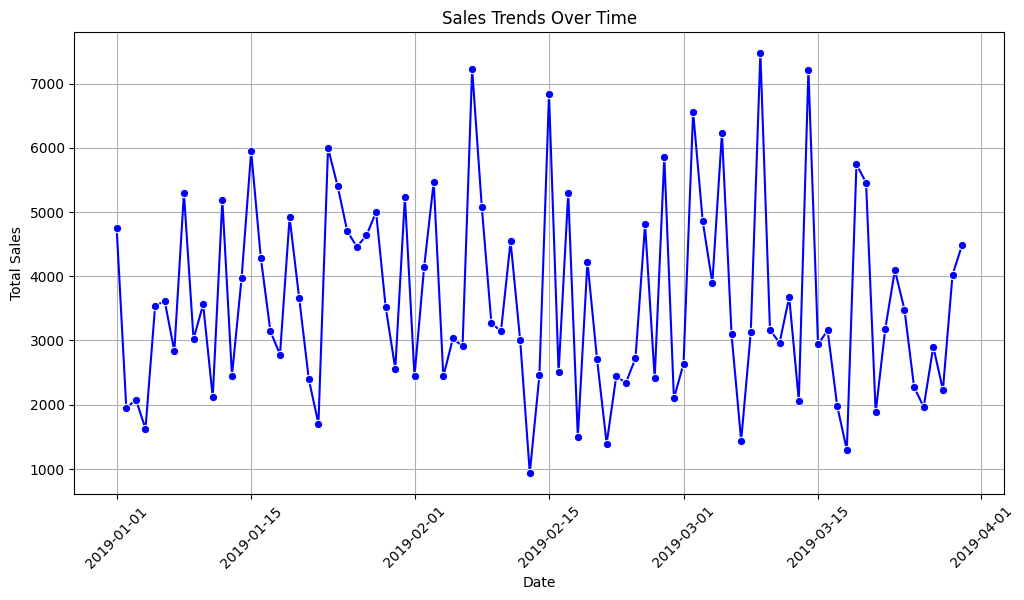

In [ ]:
# Group by date and calculate total sales
sales_trend = df.groupby('Date')['Total'].sum().reset_index()

# Plot sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total', data=sales_trend, marker='o', color='b')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)

### 4.Statical Analysis

In [28]:
# Average rating by gender
print(df.groupby('Gender')['Rating'].mean())

# Total sales by branch
print(df.groupby('Branch')['Total'].sum())

# Average unit price by product line
print(df.groupby('Product line')['Unit price'].mean())

# Total gross income by customer type
print(df.groupby('Customer type')['gross income'].sum())

Gender
Female    6.964471
Male      6.980962
Name: Rating, dtype: float64
Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64
Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64
Customer type
Member    7820.164
Normal    7559.205
Name: gross income, dtype: float64


### Conclusion

- Exploration: The dataset contains sales data with columns like Invoice ID, Branch, City, Customer type, Gender, Product line, etc.

- Preprocessing: The data is clean with no missing values or duplicates. Dates and times are converted to appropriate formats.

- Visualization: Visualizations show trends like sales by product line, distribution of ratings, and distribution of payment methods.

- Statistical Analysis: Include average ratings by gender, total sales by branch, and gross income by customer type.